<a href="https://colab.research.google.com/github/nisargbm/ACPS/blob/master/YOLO_Account_Number.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drive Mount

In [0]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# Installation of Module

In [0]:
!pip install pydrive
#!git clone https://github.com/thtrieu/darkflow.git
!pip install Cython 
!pip install pytube
!pip install PyDrive

     |████████████████████████████████| 993kB 3.4MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built pydrive


In [0]:
import os
os.chdir('gdrive/My Drive/darkflow')
!pwd

!pip install -e .

/content/gdrive/My Drive/darkflow
Obtaining file:///content/gdrive/My%20Drive/darkflow
  Running setup.py develop for darkflow


# Imports

In [0]:

import pydrive
import time
from tqdm import tqdm
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import files
from oauth2client.client import GoogleCredentials

In [0]:

from darkflow.net.build import TFNet
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [0]:
options = {"model": "cfg/yolo_custom_with_payee.cfg", 
           "load": "bin/yolo.weights",
           "batch": 1,
           "epoch": 150,
           "gpu": 1.0,
           "train": True,
           "annotation": "./annotation_payee/",
           "dataset": "./images_payee/"}

# Summary of Architecture

In [0]:
tfnet = TFNet(options)

Parsing ./cfg/yolo.cfg
Parsing cfg/yolo_custom_with_payee.cfg
Loading bin/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 0.5366106033325195s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
Instructions for updating:
Colocations handled automatically by placer.
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2               

# Training Yolo

In [0]:
tfnet.train()


cfg/yolo_custom_with_payee.cfg parsing ./annotation_payee/
Parsing for ['number', 'label_amount'] 
[====================>]100%  Cheque 309099.xml
Statistics:
number: 58
Dataset size: 58
Dataset of 58 instance(s)
Training statistics: 
	Learning rate : 1e-05
	Batch size    : 1
	Epoch number  : 150
	Backup every  : 2000
step 1 - loss 234.85511779785156 - moving ave loss 234.85511779785156
step 2 - loss 233.08648681640625 - moving ave loss 234.67825469970703
step 3 - loss 230.5640869140625 - moving ave loss 234.26683792114258
step 4 - loss 229.10557556152344 - moving ave loss 233.75071168518068
step 5 - loss 227.7726593017578 - moving ave loss 233.1529064468384
step 6 - loss 226.82864379882812 - moving ave loss 232.52048018203737
step 7 - loss 226.37149047851562 - moving ave loss 231.90558121168522
step 8 - loss 224.55287170410156 - moving ave loss 231.17031026092684
step 9 - loss 223.50753784179688 - moving ave loss 230.40403301901384
step 10 - loss 222.80279541015625 - moving ave loss 2

In [0]:
tfnet.savepb()


NameError: ignored

# Load Model

In [0]:
options = {"model": "cfg/yolo_custom_with_payee.cfg",
           "load": -1,
           "gpu": 1.0}

In [0]:
tfnet2 = TFNet(options)


Parsing cfg/yolo_custom_with_payee.cfg
Loading None ...
Finished in 0.00013589859008789062s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
Instructions for updating:
Colocations handled automatically by placer.
       |        | input                            | (?, 608, 608, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky 

In [0]:
tfnet2.load_from_ckpt()


Loading from ./ckpt/yolo_custom_with_payee-8700
INFO:tensorflow:Restoring parameters from ./ckpt/yolo_custom_with_payee-8700


# Loading Image

In [0]:
%cd ..

/content/gdrive/My Drive


In [0]:
import pprint as pp

original_img = cv2.imread("IDRBT Cheque Image Dataset/300/Cheque 083655.tif")
gray_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
results = tfnet2.return_predict(gray_img)
print(results)

[{'label': 'number', 'confidence': 0.0, 'topleft': {'x': 405, 'y': 538}, 'bottomright': {'x': 1039, 'y': 609}}, {'label': 'number', 'confidence': 0.54647475, 'topleft': {'x': 396, 'y': 543}, 'bottomright': {'x': 1051, 'y': 610}}]


# Plotting Image

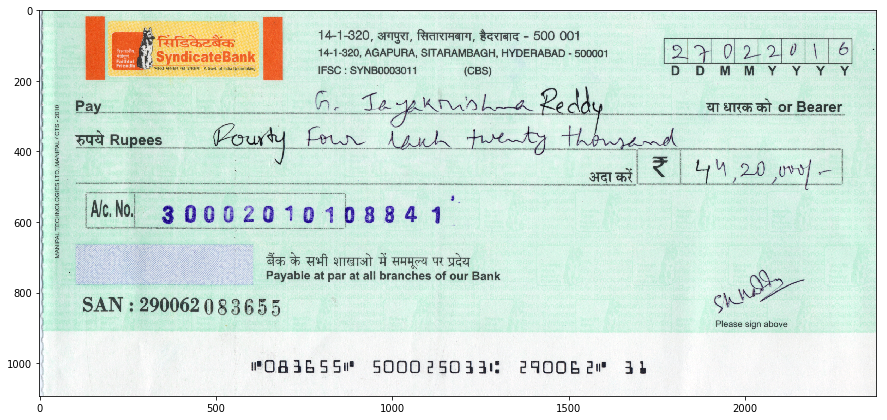

In [0]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(gray_img)

/content/gdrive/My Drive


# OCR Install

In [0]:
!sudo apt-get install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 16 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,437 kB/s)
debconf: unable to initi

# OCR Recognition

In [0]:
!pip install python-docx

     |████████████████████████████████| 5.5MB 3.3MB/s 
  Stored in directory: /root/.cache/pip/wheels/18/0b/a0/1dd62ff812c857c9e487f27d80d53d2b40531bec1acecfa47b
Successfully built python-docx


# Run Code for All File (escape if not for all file)

In [0]:
import pytesseract



folder = 'IDRBT Cheque Image Dataset/300'


f = open('acc_no_result.txt', 'w')
file_name = []
predicted_OCR = []



for file in os.listdir(folder):
  original_image = cv2.imread(os.path.join(folder,file))
  gray_image = cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)
  predictions = tfnet2.return_predict(gray_image)
  print(predictions)
  confidence = 0.60
  60
  index = 0
  counter = 0
  for result in predictions:
    if result['confidence']>confidence:
      confidence = result['confidence']
      index = counter
    index += counter
  if(not(not predictions)):
    result = predictions[index]
    crop_image = gray_image[result['topleft']['y']:result['bottomright']['y'],result['topleft']['x']:result['bottomright']['x']]
    txt = pytesseract.image_to_string(crop_image)
    #print('cheque no: ',file,' result: ',txt)
    row = 'cheque no: '+str(file)+' result: '+str(txt)
    file_name.append(file)
    predicted_OCR.append(txt)




[{'label': 'number', 'confidence': 0.9756805, 'topleft': {'x': 352, 'y': 531}, 'bottomright': {'x': 1193, 'y': 609}}]
[{'label': 'number', 'confidence': 0.0, 'topleft': {'x': 405, 'y': 538}, 'bottomright': {'x': 1039, 'y': 609}}, {'label': 'number', 'confidence': 0.54647475, 'topleft': {'x': 396, 'y': 543}, 'bottomright': {'x': 1051, 'y': 610}}]
[{'label': 'number', 'confidence': 0.0, 'topleft': {'x': 442, 'y': 476}, 'bottomright': {'x': 1124, 'y': 560}}, {'label': 'number', 'confidence': 0.83328176, 'topleft': {'x': 404, 'y': 481}, 'bottomright': {'x': 1174, 'y': 566}}]
[{'label': 'number', 'confidence': 0.99671614, 'topleft': {'x': 406, 'y': 506}, 'bottomright': {'x': 1196, 'y': 585}}]
[{'label': 'number', 'confidence': 0.97733945, 'topleft': {'x': 492, 'y': 522}, 'bottomright': {'x': 1223, 'y': 607}}]
[{'label': 'number', 'confidence': 0.9975471, 'topleft': {'x': 414, 'y': 513}, 'bottomright': {'x': 1229, 'y': 591}}]
[{'label': 'number', 'confidence': 0.99427086, 'topleft': {'x': 42

KeyboardInterrupt: ignored

In [0]:
def boxing(original_img , predictions):
    newImage = np.copy(original_img)
    list_a = []
    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))
        
        if confidence > 0.3:
            #list_a.append(top_x,top_y,btm_x,btm_y)
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1, cv2.LINE_AA)
        
    return newImage

# Bounding Box Visualization 

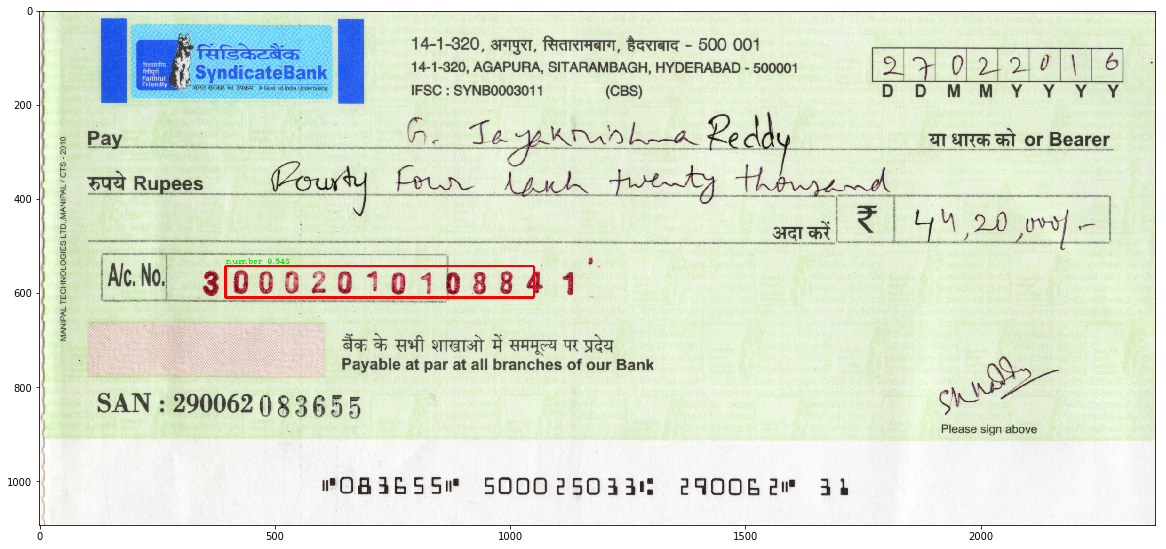

In [0]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(boxing(original_img, results))

# Code Predicted Value 

In [0]:
print(file_name,predicted_OCR)

['Cheque 083654.tif', 'Cheque 083655.tif', 'Cheque 083656.tif', 'Cheque 083657.tif', 'Cheque 083658.tif', 'Cheque 083659.tif', 'Cheque 083660.tif', 'Cheque 100828.tif', 'Cheque 100829.tif', 'Cheque 100830.tif'] ['3000201010884 1', '00020101088.', '884', '3000201010884 17', '3000201010884', '3000201010884 1', '', '630801551452', '630801551452', '630801551452']
